# 사전 준비 사항

아래를 실행시켜서 준비하고 이후 퀴즈를 풀어주세요.

In [6]:
%%writefile data.csv
name,age,tip
tom,33,10.5
jerry,35,8
철수,25,3.5
영희,26,8.8
brute,22,0
hank,31,6.6

Overwriting data.csv


In [7]:
%%writefile flawed_data.csv
age,tip
33,10.5
,8
25,-3.5
26,
22,0
31,6.6

Overwriting flawed_data.csv


In [8]:
%%writefile tips.csv
total_bill,tip,sex,smoker,day,time,size
16.99,1.01,Female,No,Sun,Dinner,2
10.34,1.66,Male,No,Sun,Dinner,3
21.01,3.5,Male,No,Sun,Dinner,3
23.68,3.31,Male,No,Sun,Dinner,2
24.59,3.61,Female,No,Sun,Dinner,4
25.29,4.71,Male,No,Sun,Dinner,4
8.77,2.0,Male,No,Sun,Dinner,2
26.88,3.12,Male,No,Sun,Dinner,4
15.04,1.96,Male,No,Sun,Dinner,2
14.78,3.23,Male,No,Sun,Dinner,2

Overwriting tips.csv


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Quiz.1

파일 data.csv의 내용은 다음과 같다.
```
name,age,tip
tom,33,10.5
jerry,35,8
철수,25,3.5
영희,26,8.8
brute,22,0
hank,31,6.6
```

data.csv를 Pandas로 읽고,

tip 컬럼의 값을 2배한 값으로 하는 새로운 컬럼 doubled_tip을 생성하고 dataframe을 출력한다. 

기대되는 출력은 다음과 같다.
```
    name  age   tip  doubled_tip
0    tom   33  10.5         21.0
1  jerry   35   8.0         16.0
2     철수   25   3.5          7.0
3     영희   26   8.8         17.6
4  brute   22   0.0          0.0
5   hank   31   6.6         13.2
```

age 컬럼의 값이 30보다 큰 row만 추린 dataframe을 구하고 이를 출력한다.

기대되는 출력은 다음과 같다.
```
2       철수
3       영희
4    brute
Name: name, dtype: object
```

In [10]:
df = pd.read_csv("data.csv")
print(df)

    name  age   tip
0    tom   33  10.5
1  jerry   35   8.0
2     철수   25   3.5
3     영희   26   8.8
4  brute   22   0.0
5   hank   31   6.6


In [11]:
df['doubled_tip'] = df.tip * 2.0
print(df)

    name  age   tip  doubled_tip
0    tom   33  10.5         21.0
1  jerry   35   8.0         16.0
2     철수   25   3.5          7.0
3     영희   26   8.8         17.6
4  brute   22   0.0          0.0
5   hank   31   6.6         13.2


In [12]:
print(df.loc[df.age>30, "name"])

0      tom
1    jerry
5     hank
Name: name, dtype: object


# Quiz.2

파일 flawed_data.csv의 내용은 다음과 같다.
```
age,tip
33,10.5
,8
25,-3.5
26,
22,0
31,6.6
```

Pandas로 읽고,

tip 컬럼의 음수 값은 0으로 수정한다.

그리고 결측치의 값을 각 컬럼의 평균값으로 채우고 data frame을 출력한다.

기대되는 출력은 다음과 같다.
```
    age    tip
0  33.0  10.50
1  27.4   8.00
2  25.0   0.00
3  26.0   5.02
4  22.0   0.00
5  31.0   6.60
```

그리고 age, tip 컬럼의 값을 0.0 ~ 1.0의 값으로 normalization한 age, tip을 출력한다.

기대되는 출력은 다음과 같다.
```
        age       tip
0  1.000000  1.000000
1  0.490909  0.761905
2  0.272727  0.000000
3  0.363636  0.478095
4  0.000000  0.000000
5  0.818182  0.628571
```



In [13]:
df = pd.read_csv("flawed_data.csv")
print(df)

    age   tip
0  33.0  10.5
1   NaN   8.0
2  25.0  -3.5
3  26.0   NaN
4  22.0   0.0
5  31.0   6.6


In [14]:
df.loc[df.tip<0, "tip"] = 0
df

,age,tip
0,33.0,10.5
1,NaN,8.0
2,25.0,0.0
3,26.0,NaN
4,22.0,0.0
5,31.0,6.6


In [15]:
df.fillna(df.mean(), inplace=True)
print(df)

    age    tip
0  33.0  10.50
1  27.4   8.00
2  25.0   0.00
3  26.0   5.02
4  22.0   0.00
5  31.0   6.60


In [16]:
df = (df - df.min()) / (df.max() - df.min())
print(df)

        age       tip
0  1.000000  1.000000
1  0.490909  0.761905
2  0.272727  0.000000
3  0.363636  0.478095
4  0.000000  0.000000
5  0.818182  0.628571


# Quiz.3

다음과 같은 실수 1~15의 값을 갖는 (3,5) 형태의 numpy array를 생성하고
```
[[ 1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10.]
 [11. 12. 13. 14. 15.]]
```

각 열 별로 합을 구한 5개 요소를 같는 numpy array를 출력한다.
기대되는 출력은 다음과 같다.
```
[18. 21. 24. 27. 30.]
```

In [17]:
a = np.arange(1,16).reshape(3,5)
a = a.astype(float)
print(a)

[[ 1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10.]
 [11. 12. 13. 14. 15.]]


In [18]:
s = np.sum(a, axis=0)
print(s)

[18. 21. 24. 27. 30.]


# Quiz.4

다음과 같은 numpy array를 생성하여 출력하고
```
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
```

이를 슬라이싱 해서 다음과 같은 numpy array를 출력한다.
```
[[ 7  8  9]
 [12 13 14]
 [17 18 19]]
```

In [19]:
a = np.arange(25).reshape(5,5)
print(a)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


In [20]:
a = a[1:4, 2:]
print(a)

[[ 7  8  9]
 [12 13 14]
 [17 18 19]]


## Quiz.5

다음과 같이 좌상단엔 x^2그래프, 우하단엔 2x+1그래프를 그린다.

![대체 텍스트](https://github.com/dhrim/hongik_2021/raw/master/material/library/images/graph.png)


둘다 x는 -1 ~ 1까지 0.1간격이다.

<br>

색깔, 크기, 축이름, 축 눈금, 그래프 이름 등등의 가타 설정은 임의로 해도 된다.






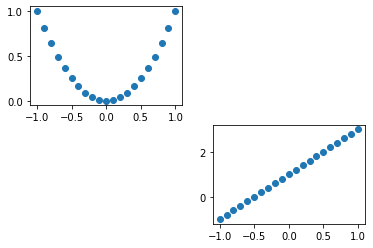

In [21]:
x = np.arange(-1,1.001,0.1)

plt.subplot(221)
plt.scatter(x, x**2)
plt.subplot(224)
plt.scatter(x, x*2+1)

plt.show()

# Quiz.6

tips.csv 파일을 읽어 다음과 같은 histogram 그래프를 그린다.

![대체 텍스트](https://github.com/dhrim/hongik_2021/raw/master/material/library/images/tips.png)



1~2값은 여자 1개, 남자 3개이고 

3~4 구간은 1개, 4개이고, 

4~5 구간은 0개, 1개로 그려져야 한다.

<br>
힌트 : 이때 히스토그램 bin의 폭을 1로 설정한다.

색깔, 크기, 축이름, 축 눈금, 그래프 이름 등등의 가타 설정은 임의로 해도 된다.

In [22]:
tips = pd.read_csv("tips.csv")
print(tips)

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
5       25.29  4.71    Male     No  Sun  Dinner     4
6        8.77  2.00    Male     No  Sun  Dinner     2
7       26.88  3.12    Male     No  Sun  Dinner     4
8       15.04  1.96    Male     No  Sun  Dinner     2
9       14.78  3.23    Male     No  Sun  Dinner     2


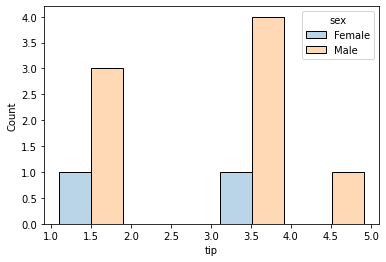

In [23]:
sns.histplot(data=tips, x="tip", hue="sex", alpha=.3, shrink=.8, multiple="dodge", binwidth=1)
plt.show()